In [0]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [0]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [0]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [0]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [0]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [0]:

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.307567596 W= 0.51798874 b= -1.129349
Epoch: 0100 cost= 0.280934006 W= 0.50202614 b= -1.014515
Epoch: 0150 cost= 0.257375360 W= 0.48701274 b= -0.9065099
Epoch: 0200 cost= 0.236536875 W= 0.47289228 b= -0.8049282
Epoch: 0250 cost= 0.218104765 W= 0.45961168 b= -0.70938873
Epoch: 0300 cost= 0.201800838 W= 0.44712088 b= -0.61953056
Epoch: 0350 cost= 0.187379956 W= 0.43537316 b= -0.5350184
Epoch: 0400 cost= 0.174624145 W= 0.42432392 b= -0.45553103
Epoch: 0450 cost= 0.163341492 W= 0.4139319 b= -0.38077152
Epoch: 0500 cost= 0.153361827 W= 0.40415794 b= -0.31045803
Epoch: 0550 cost= 0.144534796 W= 0.39496523 b= -0.24432686
Epoch: 0600 cost= 0.136727244 W= 0.38631934 b= -0.18212856
Epoch: 0650 cost= 0.129821524 W= 0.37818763 b= -0.123629555
Epoch: 0700 cost= 0.123713493 W= 0.37053946 b= -0.06860966
Epoch: 0750 cost= 0.118310995 W= 0.36334628 b= -0.016862134
Epoch: 0800 cost= 0.113532655 W= 0.35658088 b= 0.03180772
Epoch: 0850 cost= 0.109306335 W= 0.35021785 b= 0.07758291
Epoch

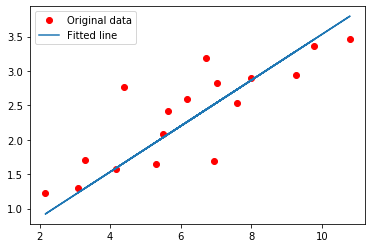

In [35]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))


    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()